## Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
from collections import Counter
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

## Data Pre-Processing

In [69]:
heart_disease_df = pd.read_csv(".\Heart_Disease_Prediction.csv")

In [70]:
heart_disease_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [71]:
heart_disease_df.isna().sum().sort_values() # No null values at all

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [72]:
heart_disease_df["Heart Disease"] = np.where(heart_disease_df["Heart Disease"] == "Presence" ,1 , 0) 
# encode presence to be 1 and not present to be 0

In [73]:
heart_disease_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


### Check for imbalance

<Axes: xlabel='Heart Disease', ylabel='count'>

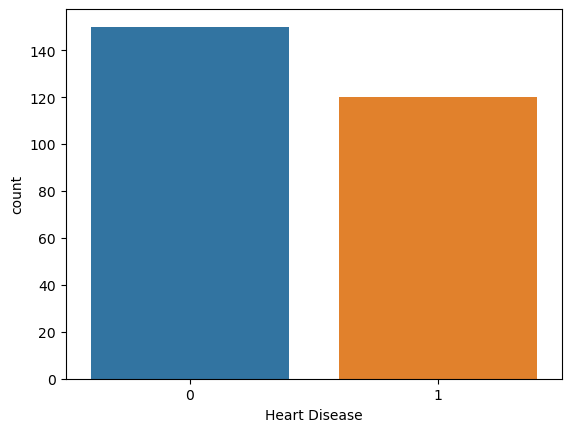

In [74]:
sns.countplot(x="Heart Disease", data= heart_disease_df)
# balanced data set + unbalanced sex feature, so we can stratify on sex

In [75]:
heart_disease_df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

### Establishing a baseline

In [76]:
X = heart_disease_df.drop('Heart Disease', axis= 1).values
y = heart_disease_df["Heart Disease"].values

In [77]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

In [79]:
print(roc_auc_score(y_test,y_pred_probs))

0.9139030612244898


In [80]:
print(classification_report(y_true= y_test, y_pred=y_pred)) # I care about the recall

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        49
           1       0.89      0.75      0.81        32

    accuracy                           0.86        81
   macro avg       0.87      0.84      0.85        81
weighted avg       0.87      0.86      0.86        81



## Feature Engineering

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'FBS over 120'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Max HR'),
  Text(3, 0, 'Cholesterol'),
  Text(4, 0, 'BP'),
  Text(5, 0, 'EKG results'),
  Text(6, 0, 'Slope of ST'),
  Text(7, 0, 'Thallium'),
  Text(8, 0, 'Chest pain type'),
  Text(9, 0, 'Sex'),
  Text(10, 0, 'ST depression'),
  Text(11, 0, 'Exercise angina'),
  Text(12, 0, 'Number of vessels fluro')])

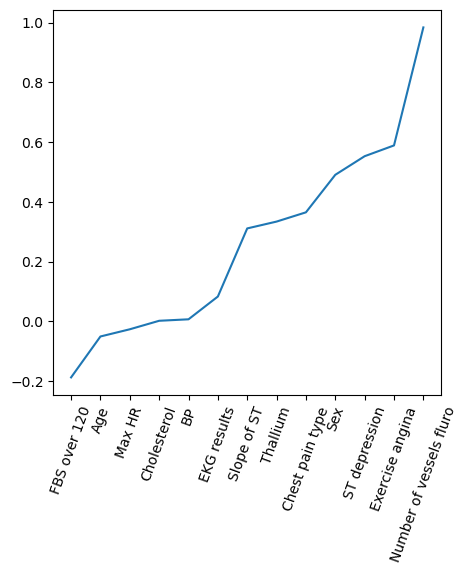

In [81]:
plt.figure(figsize=(5,5))

cols = heart_disease_df.drop('Heart Disease', axis= 1).columns.to_list()
coefficients = logreg.coef_.flatten()
sorted_indices = np.argsort(coefficients)
sorted_cols = [cols[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]
plt.plot(sorted_cols,sorted_coefficients)
plt.xticks(rotation=70)  # Adjust the rotation angle as needed (in degrees)


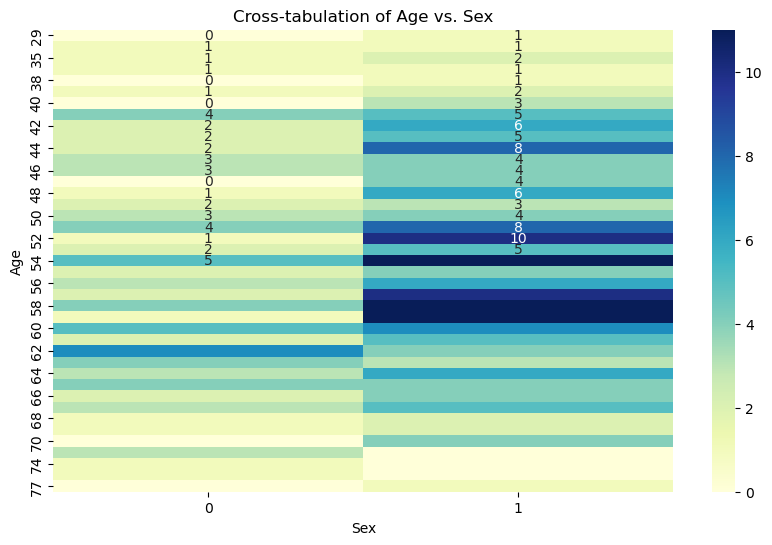

In [82]:
cross_tab = pd.crosstab(heart_disease_df['Age'], heart_disease_df['Sex'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cross-tabulation of Age vs. Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

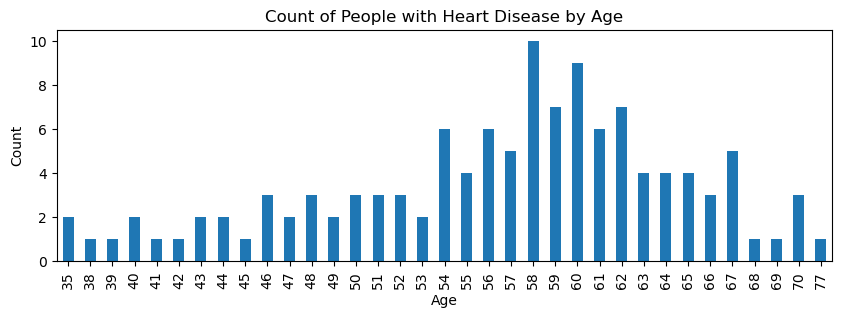

In [83]:
age_heart_disease = heart_disease_df[heart_disease_df['Heart Disease'] == 1].groupby('Age').size()

# Plotting
plt.figure(figsize=(10, 3))
age_heart_disease.plot(kind='bar')
plt.title('Count of People with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

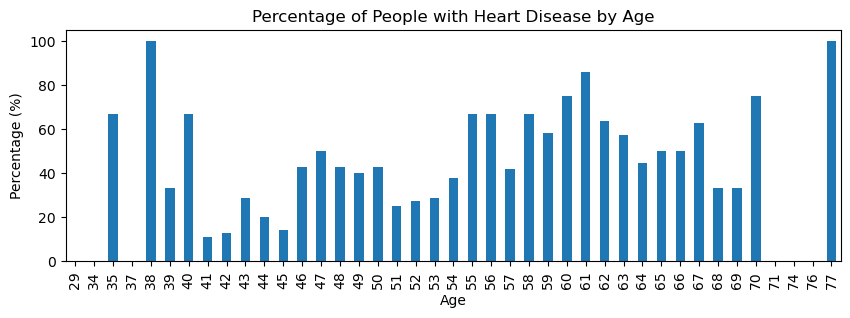

In [84]:
plt.figure(figsize=(10,3))

total_counts = heart_disease_df.groupby('Age').size()

# Group by age and calculate the number of people with heart disease in each age group
heart_disease_counts = heart_disease_df[heart_disease_df['Heart Disease'] == 1].groupby('Age').size()

# Calculate the percentage of people with heart disease in each age group
percentage_heart_disease = (heart_disease_counts / total_counts) * 100

# Replace NaN values with 0 (if any age group has no heart disease cases)
percentage_heart_disease = percentage_heart_disease.fillna(0)

# Plotting
percentage_heart_disease.plot(kind='bar')
plt.title('Percentage of People with Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.show()

## Categorical data

In [85]:
heart_disease_df_cat = heart_disease_df[["Chest pain type","Sex","EKG results","Exercise angina","Number of vessels fluro","Thallium","Slope of ST","FBS over 120"]]

In [86]:
heart_disease_df_cat_cleaned = pd.DataFrame()

#### Sex

<Axes: xlabel='Sex', ylabel='count'>

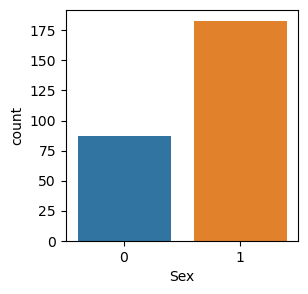

In [87]:
plt.figure(figsize=(3,3))
sns.countplot(x='Sex', data= heart_disease_df_cat)

#### Chest pain type

<Axes: xlabel='Chest pain type', ylabel='count'>

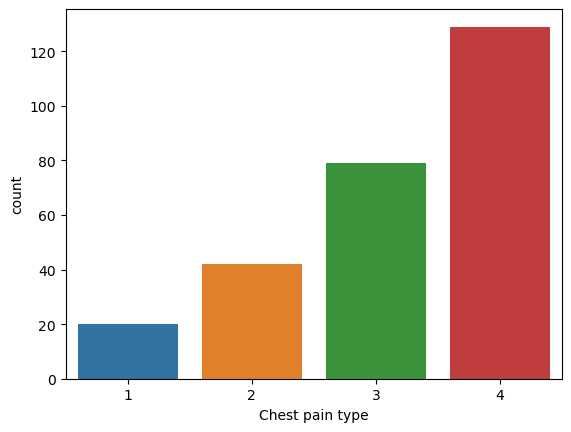

In [88]:
sns.countplot(x="Chest pain type", data= heart_disease_df_cat)

In [89]:
def scale(x, new_min= -2, new_max= 1, mini= 1,maxi= 4):
    return new_min + ((x - mini)*(new_max - new_min)/(maxi - mini))

In [90]:
chest = heart_disease_df_cat["Chest pain type"]
chest_scaled = list(map(scale, chest))

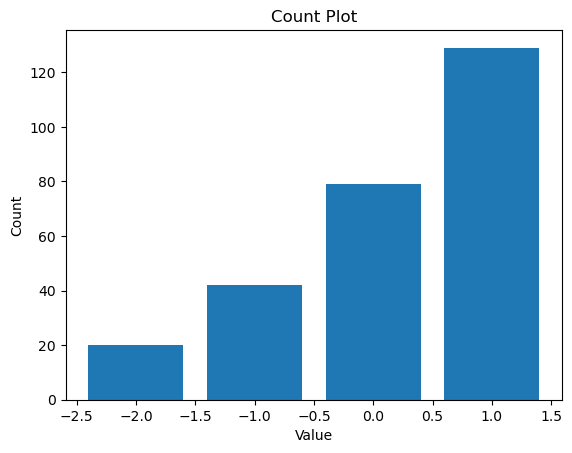

In [91]:
counter = Counter(chest_scaled)
# Extract unique values and their counts
labels, counts = zip(*counter.items())

# Create the count plot
plt.bar(labels, counts)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count Plot')

# Show the plot
plt.show()

In [92]:
heart_disease_df_cat_cleaned["Chest pain type"] = chest_scaled

#### EKG results

<Axes: xlabel='EKG results', ylabel='count'>

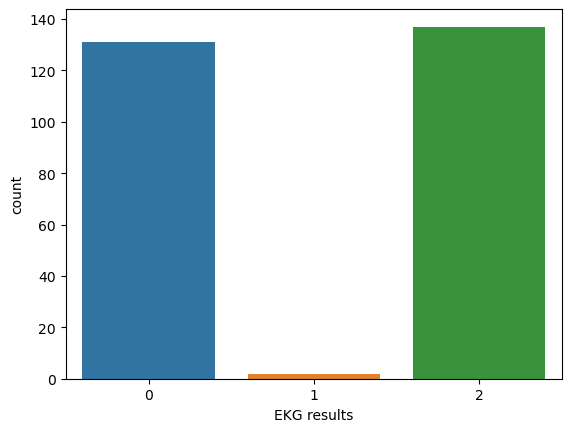

In [93]:
sns.countplot(x="EKG results", data= heart_disease_df_cat)

In [94]:
print(heart_disease_df.groupby("EKG results").size())

EKG results
0    131
1      2
2    137
dtype: int64


In [95]:
heart_disease_df[heart_disease_df["EKG results"] == 1] # let's see if they contribute to the result or not

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
73,76,0,3,140,197,0,1,116,0,1.1,2,0,3,0
110,55,0,4,180,327,0,1,117,1,3.4,2,0,3,1


In [96]:
# just drop it (later)
heart_disease_df_cat_cleaned["EKG results"] = heart_disease_df["EKG results"]

#### Exercise angina

<Axes: xlabel='Exercise angina', ylabel='count'>

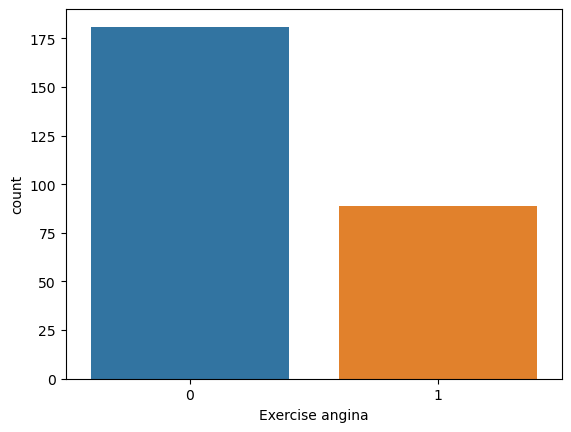

In [97]:
sns.countplot(x="Exercise angina", data= heart_disease_df_cat)

In [98]:
heart_disease_df_cat_cleaned["Excercise angina"] = heart_disease_df["Exercise angina"]

#### Number of vessels fluro

<Axes: xlabel='Number of vessels fluro', ylabel='count'>

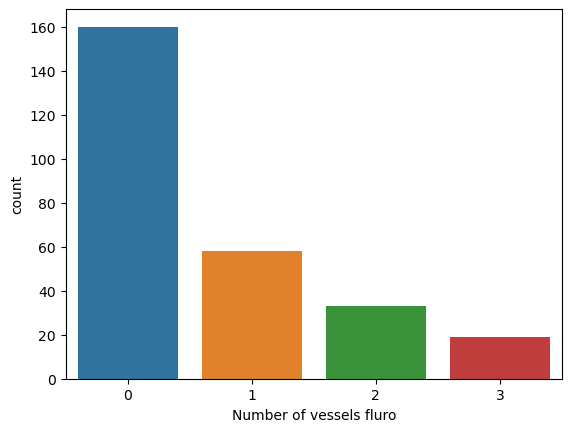

In [99]:
sns.countplot(x="Number of vessels fluro", data= heart_disease_df_cat)

In [100]:
num_vessels = heart_disease_df_cat["Number of vessels fluro"]
partial_scale = partial(scale, new_min= -1, new_max = 2, mini=0, maxi= 3)
num_vessels_scaled = list(map(partial_scale, num_vessels))

In [101]:
heart_disease_df_cat_cleaned["Number of vessels fluro"] = num_vessels_scaled

#### Thallium

<Axes: xlabel='Thallium', ylabel='count'>

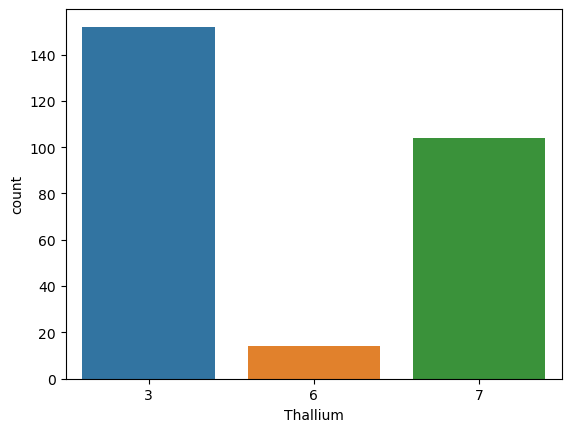

In [102]:
sns.countplot(x="Thallium", data= heart_disease_df_cat)

In [103]:
heart_disease_df[heart_disease_df["Thallium"] == 6].head() # can't be dropped because it has an effect in the result but needs more data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
31,66,1,4,160,228,0,2,138,0,2.3,1,0,6,0
44,59,1,3,126,218,1,0,134,0,2.2,2,1,6,1
48,66,1,2,160,246,0,0,120,1,0.0,2,3,6,1
50,42,1,4,136,315,0,0,125,1,1.8,2,0,6,1


In [104]:
partial_scale_2 = partial(scale, new_min= -1, new_max= 1, mini=3, maxi= 7)
heart_disease_df_cat_cleaned["Thallium"] = list(map(partial_scale_2, heart_disease_df_cat["Thallium"]))

#### Slope of ST

<Axes: xlabel='Slope of ST', ylabel='count'>

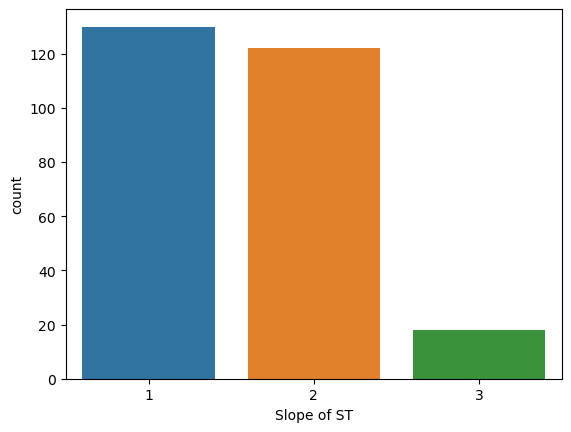

In [105]:
slope_st = heart_disease_df_cat["Slope of ST"]
sns.countplot(x="Slope of ST", data= heart_disease_df_cat)

In [106]:
heart_disease_df[heart_disease_df["Slope of ST"] == 3].head() # can't be dropped because it has an effect in the result but needs more data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
17,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
33,59,1,4,170,326,0,2,140,1,3.4,3,0,7,1
64,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
87,59,1,1,178,270,0,2,145,0,4.2,3,0,7,0
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7,1


In [107]:
partial_scale_3 = partial(scale, new_min= -1, new_max= 1, mini=1, maxi= 3)
heart_disease_df_cat_cleaned["slope_st"] = list(map(partial_scale_3, heart_disease_df_cat["Slope of ST"]))

#### FBS over 120

<Axes: xlabel='FBS over 120', ylabel='count'>

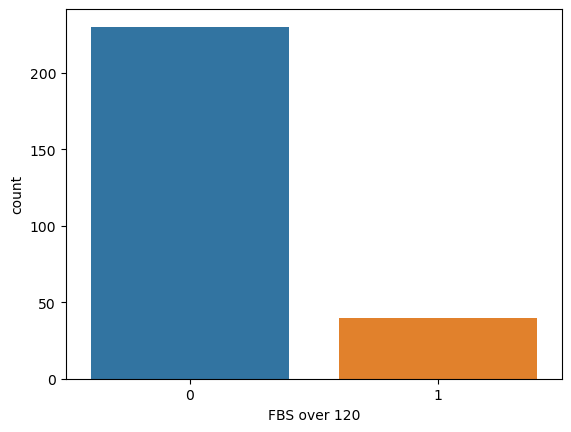

In [108]:
sns.countplot(x="FBS over 120", data= heart_disease_df_cat)

In [109]:
heart_disease_df[heart_disease_df["FBS over 120"] == 1].head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
17,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
24,54,0,2,132,288,1,2,159,1,0.0,1,1,3,0
29,71,0,3,110,265,1,2,130,0,0.0,1,1,3,0
35,48,1,4,130,256,1,2,150,1,0.0,1,2,7,1


In [110]:
heart_disease_df_cat_cleaned["Sex"] = heart_disease_df_cat["Sex"]

In [111]:
heart_disease_df_cat_cleaned.head()

,Chest pain type,EKG results,Excercise angina,Number of vessels fluro,Thallium,slope_st,Sex
0,1.0,2,0,2.0,-1.0,0.0,1
1,0.0,2,0,-1.0,1.0,0.0,0
2,-1.0,0,0,-1.0,1.0,-1.0,1
3,1.0,0,1,0.0,1.0,0.0,1
4,-1.0,2,1,0.0,-1.0,-1.0,0


### Continous data

In [112]:
heart_disease_df_cont = heart_disease_df[["BP", "Cholesterol","Max HR","ST depression"]]

In [113]:
heart_disease_df_cont.describe()

,BP,Cholesterol,Max HR,ST depression
count,270.000000,270.000000,270.000000,270.00000
mean,131.344444,249.659259,149.677778,1.05000
std,17.861608,51.686237,23.165717,1.14521
min,94.000000,126.000000,71.000000,0.00000
25%,120.000000,213.000000,133.000000,0.00000
50%,130.000000,245.000000,153.500000,0.80000
75%,140.000000,280.000000,166.000000,1.60000
max,200.000000,564.000000,202.000000,6.20000


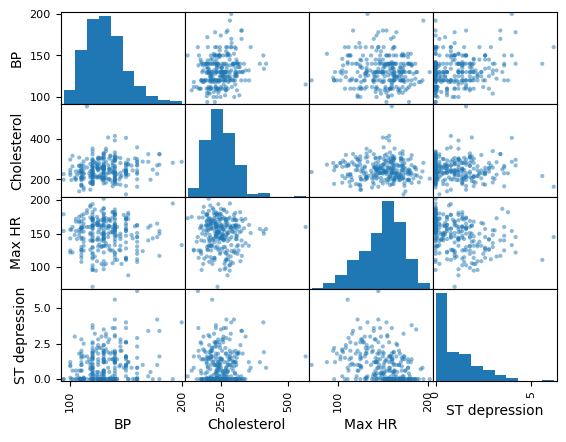

In [114]:
scatter_matrix(heart_disease_df_cont)
plt.show()

In [115]:
heart_disease_df_cont_cleaned = pd.DataFrame()

#### Cholesterol

In [116]:
heart_disease_df_cont["BP"].corr(heart_disease_df_cont["Cholesterol"]) # no need for another feature

0.17301917553469223

In [117]:
heart_disease_df_cont_cleaned["bp"] = heart_disease_df_cont["BP"]
heart_disease_df_cont_cleaned["cholesterol"] = heart_disease_df_cont["Cholesterol"]

#### Max HR

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


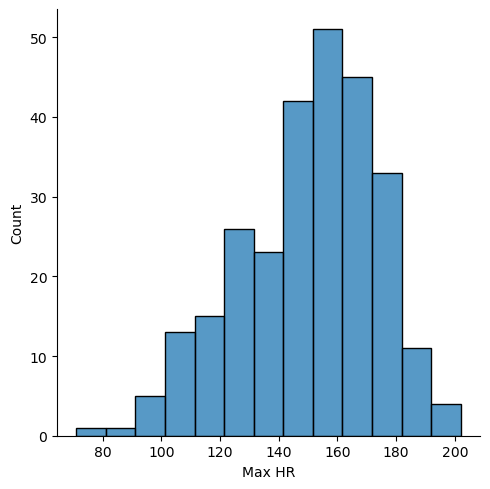

In [118]:
sns.displot(heart_disease_df_cont, x="Max HR")

In [119]:
def squared(elem):
    return elem**2

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


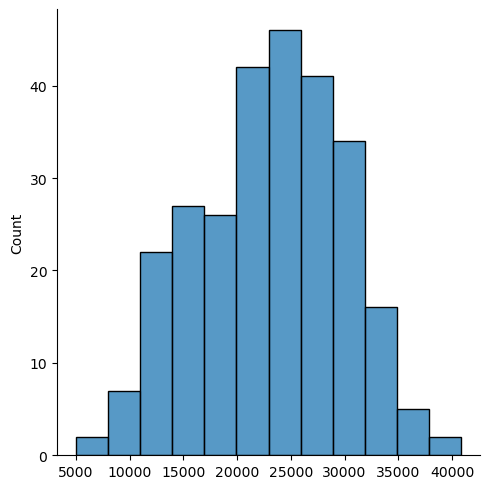

In [120]:
max_hr = heart_disease_df_cont["Max HR"]
hr_scaled = list(map(squared, max_hr))
sns.displot(hr_scaled)

In [121]:
heart_disease_df_cont_cleaned["max_hr"] = hr_scaled

#### ST depression

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


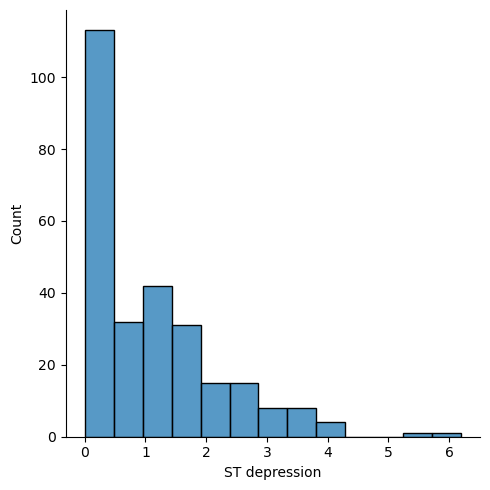

In [122]:
sns.displot(heart_disease_df_cont, x="ST depression")

In [123]:
st_dep = heart_disease_df_cont["ST depression"]
st_dep_scaled = list(map(np.log, st_dep + 0.1)) # to avoid going to -inf

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


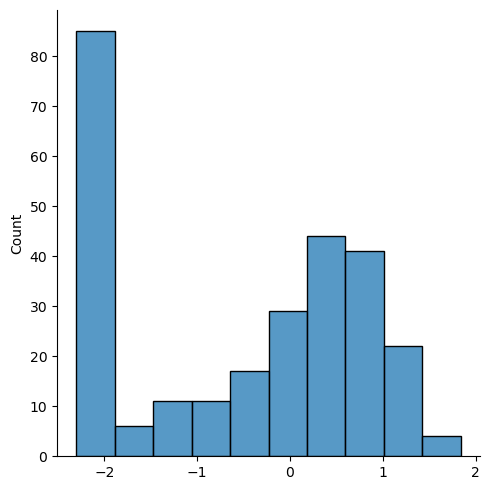

In [124]:
sns.displot(st_dep_scaled)

In [125]:
heart_disease_df_cont_cleaned["st_dep"] = st_dep_scaled

In [126]:
heart_disease_df_cont_cleaned.head()

,bp,cholesterol,max_hr,st_dep
0,130,322,11881,0.916291
1,115,564,25600,0.530628
2,124,261,19881,-0.916291
3,128,263,11025,-1.203973
4,120,269,14641,-1.203973


### Scaling

In [127]:
scaler = StandardScaler()
heart_disease_df_cont_cleaned[["bp","cholesterol","max_hr"]] = scaler.fit_transform(heart_disease_df_cont_cleaned[["bp","cholesterol","max_hr"]])

In [128]:
heart_disease_df_cont_cleaned.head()

,bp,cholesterol,max_hr,st_dep
0,-0.075410,1.402212,-1.656317,0.916291
1,-0.916759,6.093004,0.398744,0.530628
2,-0.411950,0.219823,-0.457944,-0.916291
3,-0.187590,0.258589,-1.784543,-1.203973
4,-0.636310,0.374890,-1.242878,-1.203973


In [129]:
heart_disease_df_cleaned = pd.concat([heart_disease_df_cat_cleaned, heart_disease_df_cont_cleaned], axis= 1)

In [130]:
heart_disease_df_cleaned.head()

,Chest pain type,EKG results,Excercise angina,Number of vessels fluro,Thallium,slope_st,Sex,bp,cholesterol,max_hr,st_dep
0,1.0,2,0,2.0,-1.0,0.0,1,-0.075410,1.402212,-1.656317,0.916291
1,0.0,2,0,-1.0,1.0,0.0,0,-0.916759,6.093004,0.398744,0.530628
2,-1.0,0,0,-1.0,1.0,-1.0,1,-0.411950,0.219823,-0.457944,-0.916291
3,1.0,0,1,0.0,1.0,0.0,1,-0.187590,0.258589,-1.784543,-1.203973
4,-1.0,2,1,0.0,-1.0,-1.0,0,-0.636310,0.374890,-1.242878,-1.203973


### Model

In [131]:
fin_logreg = LogisticRegression()
X = heart_disease_df_cleaned.values
y = heart_disease_df["Heart Disease"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, stratify= y, random_state= 42)
fin_logreg.fit(X_train, y_train)
y_pred = fin_logreg.predict(X_test)

In [132]:
y_pred_probs = fin_logreg.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_probs))

0.9271604938271605


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.79      0.94      0.86        36

    accuracy                           0.86        81
   macro avg       0.87      0.87      0.86        81
weighted avg       0.88      0.86      0.86        81



### Fine-tune

In [134]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(fin_logreg, X,y, cv= kf)
print(cv_results)

[0.91111111 0.77777778 0.8        0.88888889 0.77777778 0.77777778]


In [135]:
print(np.mean(cv_results), np.std(cv_results))

0.8222222222222223 0.05592469952052405


In [165]:
parameters = {"C" : np.arange(0.01, 10.0),
              "solver": ['liblinear','newton-cg','lbfgs'],
              "penalty":['l1','l2']}

fin_logreg_2 = LogisticRegression()
fin_log_reg_cv = GridSearchCV(fin_logreg_2, parameters, cv = kf)
fin_log_reg_cv.fit(X_train, y_train)
print(fin_log_reg_cv.best_params_, fin_log_reg_cv.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'} 0.8197244623655915


d:\AnaConda\Here\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "d:\AnaConda\Here\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check

In [166]:
y_pred_probs = fin_log_reg_cv.predict_proba(X_test)[:,1]
y_pred = fin_log_reg_cv.predict(X_test)
print(roc_auc_score(y_test, y_pred_probs))

0.9320987654320987


In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.89      0.86      0.87        36

    accuracy                           0.89        81
   macro avg       0.89      0.89      0.89        81
weighted avg       0.89      0.89      0.89        81



#### Controlling the recall

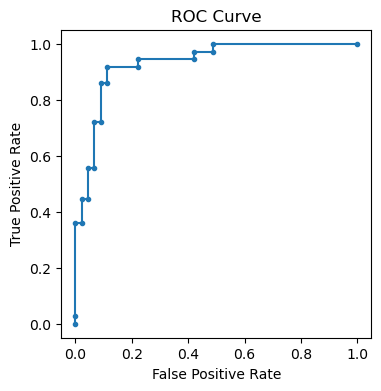

Optimal Threshold: 0.47022156702042556


In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
# Plot the ROC curve
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Choose the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")


In [172]:
threshold = 0.47
y_pred = (y_pred_probs >= threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        45
           1       0.87      0.92      0.89        36

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81

